# **Submission**
Proyek Akhir : Klasifikasi Gambar

**Data Diri - Profil dicoding**
*   Nama: Adinda Putri Khusnul Khotimah
*   Username: adindaputrikh
*   Email: putriadinda1287@gmail.com

In [1]:
#Import Akses TensorFlow
import tensorflow as tf

#Import Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Import Pengambian Files Image
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
#Download Extract Dataset RockPaperScissors
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip -P /tmp
!unzip /tmp/rockpaperscissors.zip -d /tmp

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /tmp/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /tmp/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /tmp/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /tmp/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /tmp/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: /tmp/rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  

In [20]:
#Membuat Augmentasi Gambar Menggunakan Image Data Generator.
datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    #Ukuran Validation Set 40%
    validation_split = 0.4
    )

In [21]:
#Generator Data Validation
#Membagi Dataset Menjadi Train Set dan Validaton Set
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_generator = datagen.flow_from_directory(
    base_dir,
    batch_size=32,
    target_size = (150,150),
    subset = 'training',
    class_mode = 'categorical'
    )

validation_generator = datagen.flow_from_directory(
    base_dir,
    batch_size=32,
    target_size = (150,150),
    subset = 'validation',
    class_mode = 'categorical'
    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [22]:
#Membuat Jaringan Saraf Tiruan dengan Model Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D (32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D (2, 2),
    tf.keras.layers.Conv2D (64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D (2,2),
    tf.keras.layers.Conv2D (128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D (2,2),
    tf.keras.layers.Flatten(),
    #Hidden Layer Pertama
    tf.keras.layers.Dense (units = 512, activation = 'relu'),
    #Hidden Layer Kedua
    tf.keras.layers.Dense(units = 256, activation='relu'),
    #Hidden Layer Ketiga
    tf.keras.layers.Dense(units = 128, activation='relu'),
    tf.keras.layers.Dense (units = 3, activation = 'softmax'),
])

In [23]:
#Menggunakan Optimizer dan Loss-Function
model.compile (optimizer = tf.keras.optimizers.Adam (learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
#Melatih Model dengan Data Train dan Validation
start_time = datetime.datetime.now()

model.fit(train_generator, epochs=10, validation_data=validation_generator, validation_steps=5, verbose=2)

end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print(f'Training completed in {elapsed_time}')

Epoch 1/10
42/42 - 14s - loss: 1.0684 - accuracy: 0.4003 - val_loss: 0.9938 - val_accuracy: 0.5250 - 14s/epoch - 332ms/step
Epoch 2/10
42/42 - 11s - loss: 0.9874 - accuracy: 0.5152 - val_loss: 0.9661 - val_accuracy: 0.5000 - 11s/epoch - 273ms/step
Epoch 3/10
42/42 - 15s - loss: 0.9554 - accuracy: 0.5502 - val_loss: 0.9273 - val_accuracy: 0.6125 - 15s/epoch - 350ms/step
Epoch 4/10
42/42 - 13s - loss: 0.8841 - accuracy: 0.6027 - val_loss: 0.8094 - val_accuracy: 0.6875 - 13s/epoch - 298ms/step
Epoch 5/10
42/42 - 12s - loss: 0.6984 - accuracy: 0.7344 - val_loss: 0.6569 - val_accuracy: 0.7500 - 12s/epoch - 274ms/step
Epoch 6/10
42/42 - 11s - loss: 0.5669 - accuracy: 0.8006 - val_loss: 0.6470 - val_accuracy: 0.7000 - 11s/epoch - 270ms/step
Epoch 7/10
42/42 - 11s - loss: 0.4293 - accuracy: 0.8584 - val_loss: 0.4738 - val_accuracy: 0.8125 - 11s/epoch - 272ms/step
Epoch 8/10
42/42 - 11s - loss: 0.4294 - accuracy: 0.8486 - val_loss: 0.3033 - val_accuracy: 0.9250 - 11s/epoch - 271ms/step
Epoch 9/

In [25]:
#Mengevaluasi Akurasi Model
accuracy = model.evaluate(validation_generator)[1]
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

28/28 [==============================] - 6s 216ms/step - loss: 0.3335 - accuracy: 0.8696
Accuracy of the model: 86.96%


In [26]:
#Menyimpan Model
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
model.save(f'rock_paper_scissors_model_{timestamp}.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving itXNIVO7ghl2qja8.png to itXNIVO7ghl2qja8.png


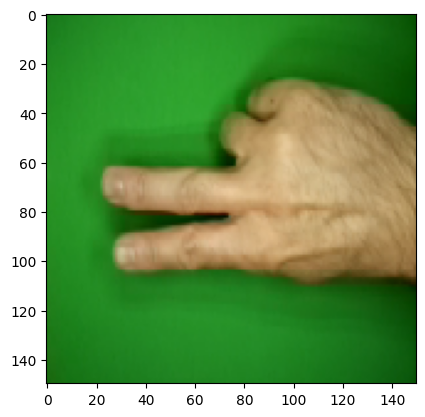

1/1 [==============================] - 0s 340ms/step
Prediction: Scissors


In [27]:
#Upload Gambar
uploaded = files.upload()

#Memprediksi Unggahan Gambar
model = tf.keras.models.load_model(f'rock_paper_scissors_model_{timestamp}.h5')
class_labels = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  #Normalize Pixel Values
    images = np.vstack([x])

    #Menggunakan Model untuk Memprediksi Probabilitas Kelas
    predicted_probabilities = model.predict(images)

    #Mendapatkan Kelas yang Diprediksi
    predicted_class = np.argmax(predicted_probabilities)

    predicted_label = class_labels[predicted_class]
    print(f'Prediction: {predicted_label}')

Saving 7cNxwgrraQGeA1LA.png to 7cNxwgrraQGeA1LA.png


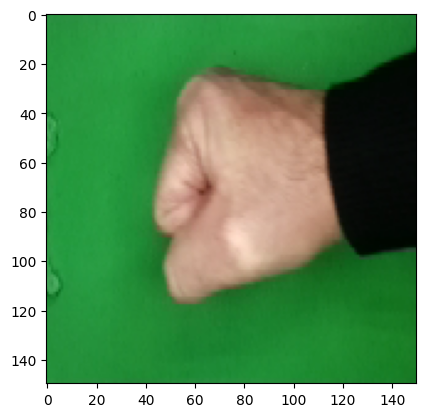

1/1 [==============================] - 0s 82ms/step
Prediction: Rock


In [31]:
#Upload Gambar
uploaded = files.upload()

#Memprediksi Unggahan Gambar
model = tf.keras.models.load_model(f'rock_paper_scissors_model_{timestamp}.h5')
class_labels = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  #Normalize Pixel Values
    images = np.vstack([x])

    #Menggunakan Model untuk Memprediksi Probabilitas Kelas
    predicted_probabilities = model.predict(images)

    #Mendapatkan Kelas yang Diprediksi
    predicted_class = np.argmax(predicted_probabilities)

    predicted_label = class_labels[predicted_class]
    print(f'Prediction: {predicted_label}')

Saving 2a3UtNzl5Ll3sq8K.png to 2a3UtNzl5Ll3sq8K.png


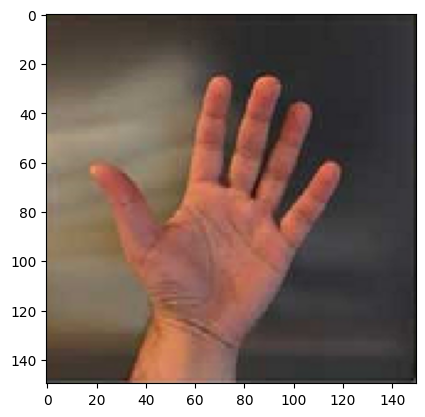

1/1 [==============================] - 0s 79ms/step
Prediction: Paper


In [34]:
#Upload Gambar
uploaded = files.upload()

#Memprediksi Unggahan Gambar
model = tf.keras.models.load_model(f'rock_paper_scissors_model_{timestamp}.h5')
class_labels = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  #Normalize Pixel Values
    images = np.vstack([x])

    #Menggunakan Model untuk Memprediksi Probabilitas Kelas
    predicted_probabilities = model.predict(images)

    #Mendapatkan Kelas yang Diprediksi
    predicted_class = np.argmax(predicted_probabilities)

    predicted_label = class_labels[predicted_class]
    print(f'Prediction: {predicted_label}')

Saving ueuECCtQxOjHF1ij.png to ueuECCtQxOjHF1ij.png


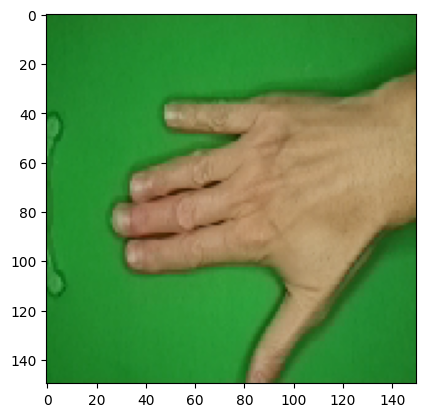

1/1 [==============================] - 0s 94ms/step
Prediction: Paper


In [42]:
#Upload Gambar
uploaded = files.upload()

#Memprediksi Unggahan Gambar
model = tf.keras.models.load_model(f'rock_paper_scissors_model_{timestamp}.h5')
class_labels = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  #Normalize pixel values
    images = np.vstack([x])

    #Menggunakan Model untuk Memprediksi Probabilitas Kelas
    predicted_probabilities = model.predict(images)

    #Mendapatkan Kelas yang Diprediksi
    predicted_class = np.argmax(predicted_probabilities)

    predicted_label = class_labels[predicted_class]
    print(f'Prediction: {predicted_label}')